In [1]:
### Flip Robo Technology Project 1
print("*******************************")
print("  Flip Robo Project Phase 1 ")
print("*******************************")
print("  OLUWAJOBA FATOLA  \n  Flip Robo Technology Internship")
print("\n")

*******************************
  Flip Robo Project Phase 1 
*******************************
  OLUWAJOBA FATOLA  
  Flip Robo Technology Internship




In [2]:
print("/////////////////////////////////////\n")
print("Medical Cost Personal Insurance Project\n")
print("/////////////////////////////////////\n")

/////////////////////////////////////

Medical Cost Personal Insurance Project

/////////////////////////////////////



In [123]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # basic visualization libraries
from IPython.display import display
import qgrid
import eda_activity_monitor as eda_module    # Custom module for Explorative Data Analysis  
%matplotlib inline
from matplotlib  import style
import seaborn as sns #clean columns 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.model_selection import GridSearchCV, train_test_split,RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.feature_selection import SelectKBest, chi2, f_classif, RFECV, RFE, mutual_info_regression
from scipy.stats import mannwhitneyu
import dataframe_image as dfi
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
import skillsnetwork
from scipy.stats import norm
from scipy import stats
from scipy.stats.mstats import winsorize
import tkinter as tk
from tkinter import messagebox

# About The Data

## Load Data 

In [4]:
# Load the dataset
data = pd.read_csv('medical_cost_insurance.csv')

# View the first few rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Let's find out how many entries there are in our dataset, using shape function.
data.shape

(1338, 7)

In [6]:
# Get information about the types of data in each column
data_info = data.info()

# Create a DataFrame to display the information
df_info = pd.DataFrame(data_info)

# Display the DataFrame
display(df_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


""


In [7]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [12]:
# Categorical Value Counts
categorical_cols = ['sex', 'smoker', 'region']
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(data[col].value_counts())


Value Counts for sex:
male      676
female    662
Name: sex, dtype: int64

Value Counts for smoker:
no     1064
yes     274
Name: smoker, dtype: int64

Value Counts for region:
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


# EDA

In [10]:
# Generate statistical summaries of the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


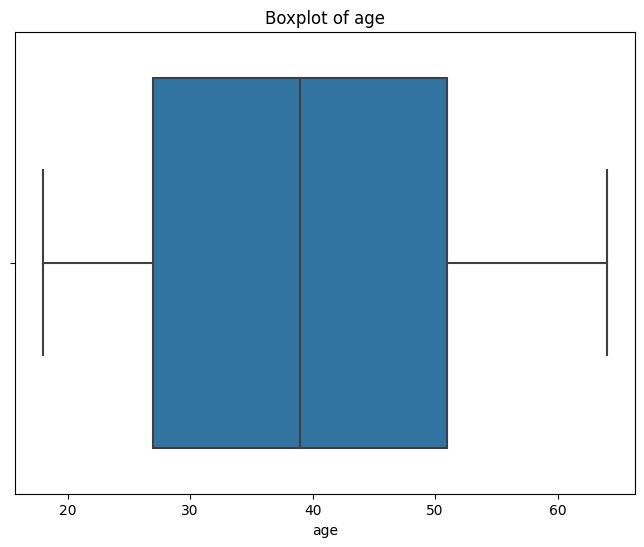

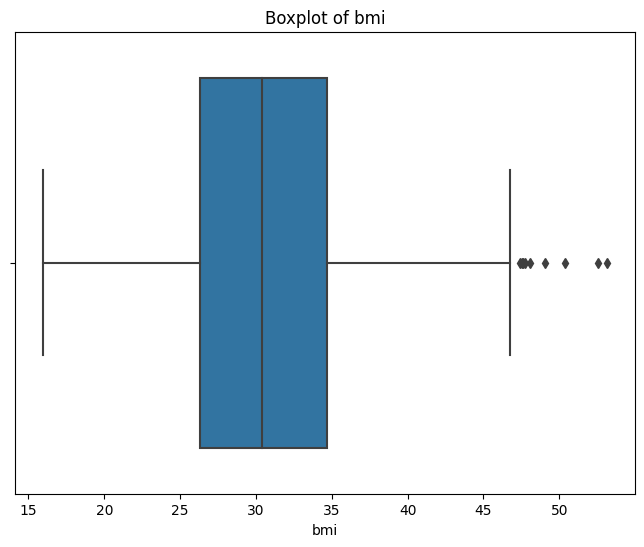

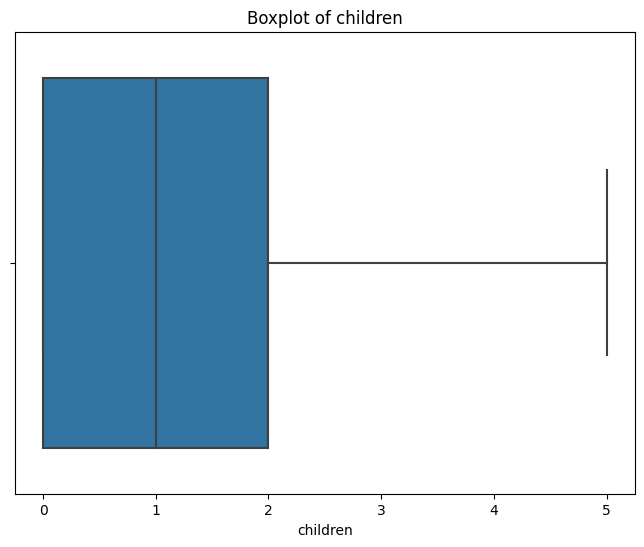

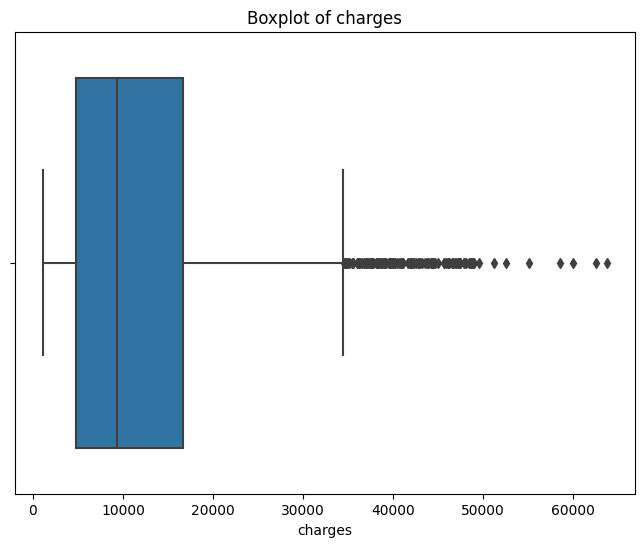

Summary Statistics after Outlier Detection:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
# List of numerical columns for outlier detection
numerical_cols = ['age', 'bmi', 'children', 'charges']

# Outlier Detection using Boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.show()

# Print Summary Statistics after Outlier Detection
summary_after_outlier_detection = data[numerical_cols].describe()
print("Summary Statistics after Outlier Detection:")
summary_after_outlier_detection

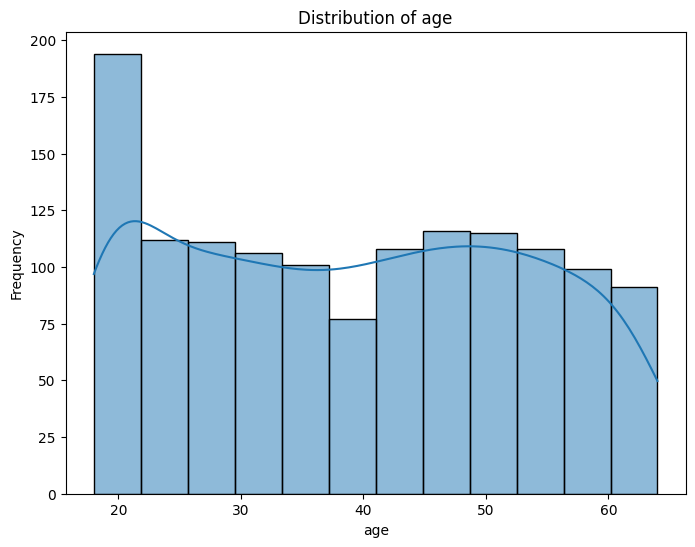

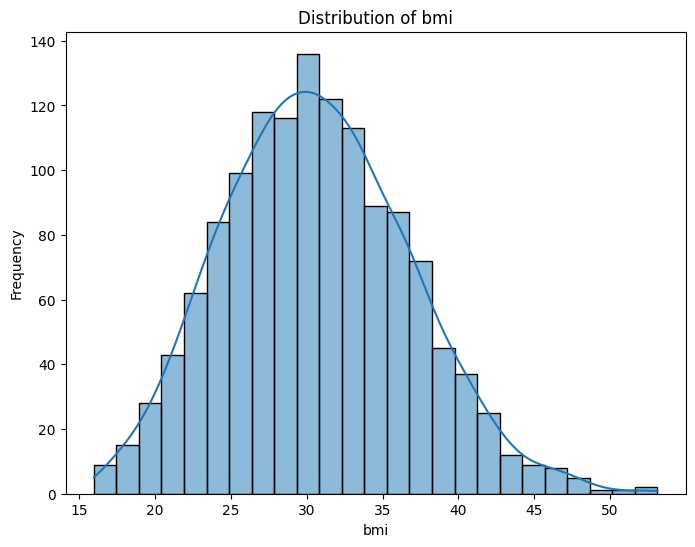

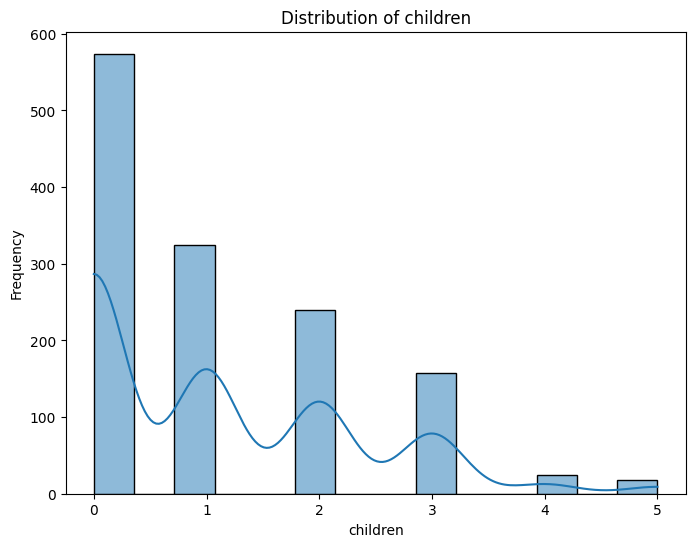

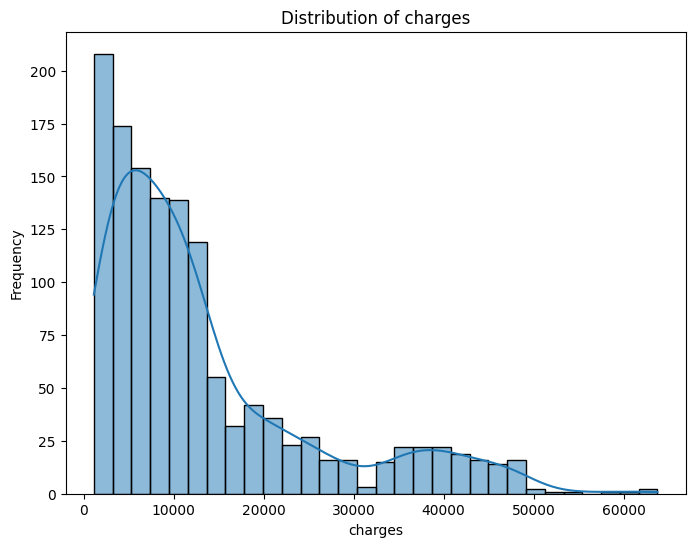

In [13]:
# Data Distribution Visualization
numerical_cols = ['age', 'bmi', 'children', 'charges']
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

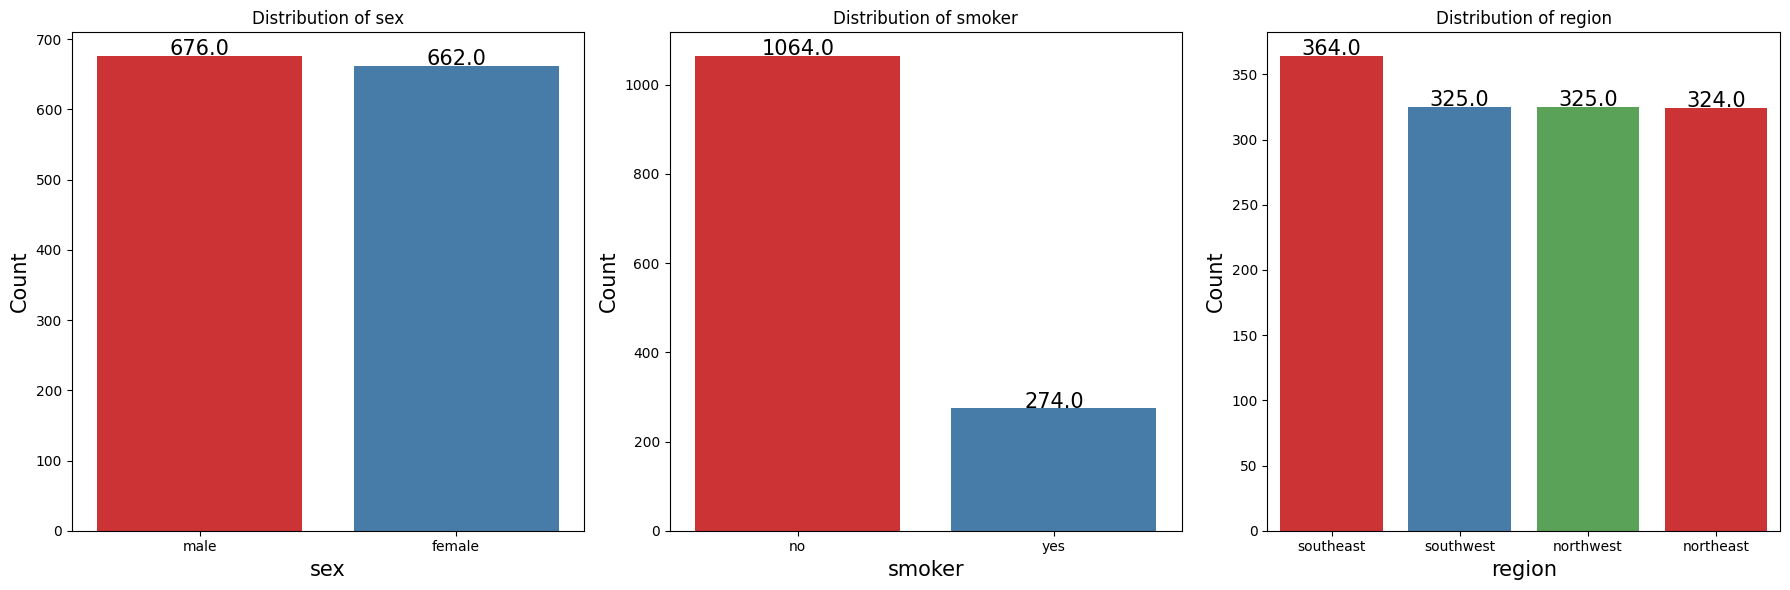

In [23]:
# Categorical Value Counts
categorical_cols = ['sex', 'smoker', 'region']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Define a color palette with different colors for each category
color_palette = sns.color_palette("Set1", len(categorical_cols))

for i, col in enumerate(categorical_cols):
    sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts(), ax=axes[i], palette=color_palette)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col, fontsize=15)  # Increase font size for x-axis label
    axes[i].set_ylabel("Count", fontsize=15)  # Increase font size for y-axis label

    # Annotate count values on the bars
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', fontsize=15, xytext=(0, 5),
                         textcoords='offset points')

plt.tight_layout()
plt.show()


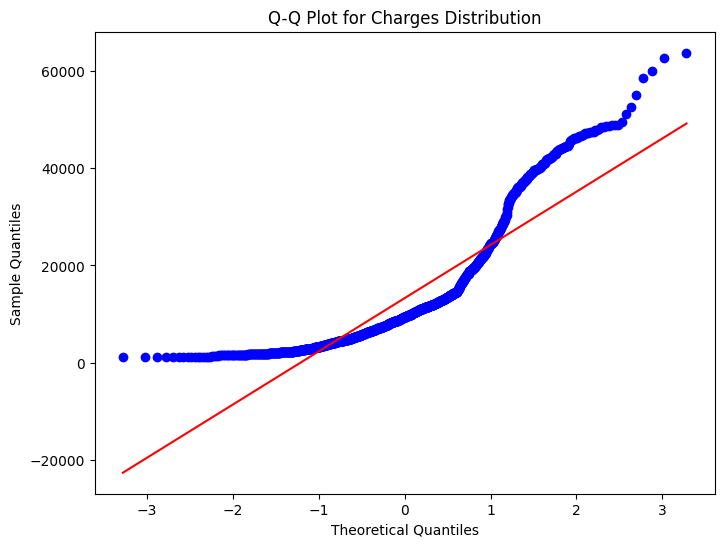


Summary of Q-Q Plot for Charges Distribution:
Number of Observations: 1338
Minimum Value: 1121.8739
Maximum Value: 63770.42801
Mean: 13270.422265141257
Variance: 146652372.152855
Skewness: 1.5141797118745743
Kurtosis: 1.595821363956751


In [27]:
# Create Q-Q plot for the 'charges' column
plt.figure(figsize=(8, 6))
stats.probplot(data['charges'], dist='norm', plot=plt)
plt.title("Q-Q Plot for Charges Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

# Summary of Q-Q Plot
qq_summary = stats.describe(data['charges'])
print(f"\nSummary of Q-Q Plot for Charges Distribution:")
print(f"Number of Observations: {qq_summary.nobs}")
print(f"Minimum Value: {qq_summary.minmax[0]}")
print(f"Maximum Value: {qq_summary.minmax[1]}")
print(f"Mean: {qq_summary.mean}")
print(f"Variance: {qq_summary.variance}")
print(f"Skewness: {qq_summary.skewness}")
print(f"Kurtosis: {qq_summary.kurtosis}")


Overall, the Q-Q plot and the summary statistics indicate that the distribution of medical insurance costs ('charges') is right-skewed and slightly leptokurtic (peaked). This implies that there may be some extreme values or outliers on the higher end of the distribution, contributing to the longer right tail.

When considering class balancing or any analysis based on the 'charges' column, it's essential to be aware of the skewness and kurtosis characteristics. Applying appropriate data transformations or considering handling extreme values to ensure the validity and effectiveness of the  analysis is therefore necesary.

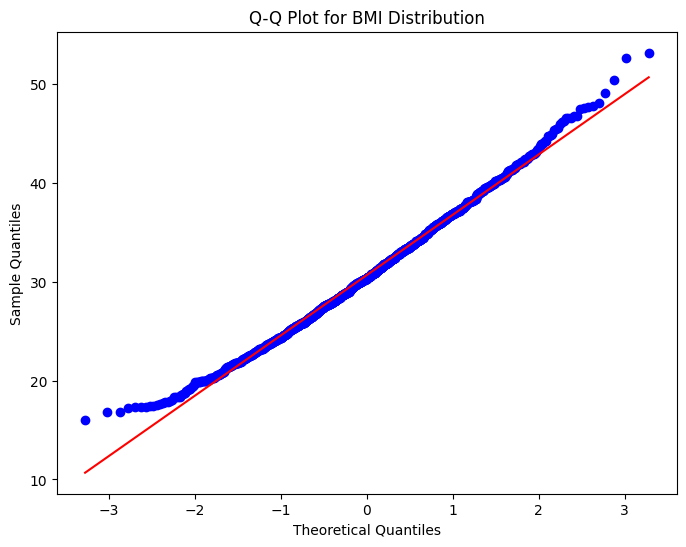


Summary of Q-Q Plot for BMI Distribution:
Number of Observations: 1338
Minimum Value: 15.96
Maximum Value: 53.13
Mean: 30.66339686098655
Variance: 37.18788360977324
Skewness: 0.28372857291709386
Kurtosis: -0.05502310583700032


In [29]:
# Create Q-Q plot for the 'bmi' column
plt.figure(figsize=(8, 6))
stats.probplot(data['bmi'], dist='norm', plot=plt)
plt.title("Q-Q Plot for BMI Distribution")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

# Summary of Q-Q Plot
qq_summary = stats.describe(data['bmi'])
print(f"\nSummary of Q-Q Plot for BMI Distribution:")
print(f"Number of Observations: {qq_summary.nobs}")
print(f"Minimum Value: {qq_summary.minmax[0]}")
print(f"Maximum Value: {qq_summary.minmax[1]}")
print(f"Mean: {qq_summary.mean}")
print(f"Variance: {qq_summary.variance}")
print(f"Skewness: {qq_summary.skewness}")
print(f"Kurtosis: {qq_summary.kurtosis}")

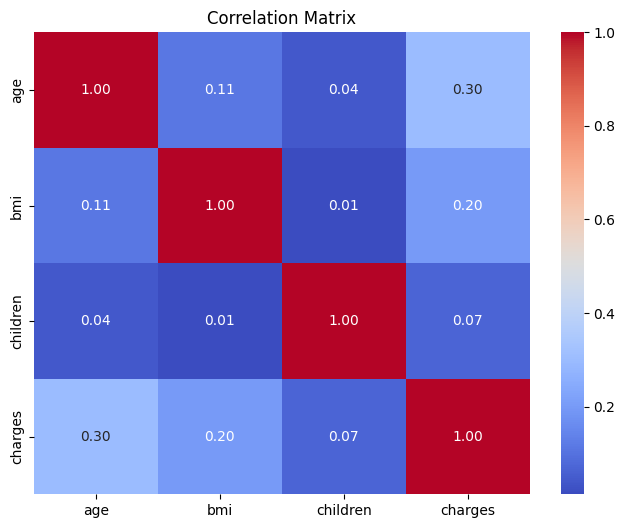

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [16]:
# Correlation Analysis
correlation_matrix = data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

correlation_matrix


In this correlation matrix:

The correlation between 'age' and 'charges' is approximately 0.3, indicating a positive but weak relationship.
The correlation between 'bmi' and 'charges' is approximately 0.2, also showing a positive but weak relationship.
The correlation between 'children' and 'charges' is approximately 0.07, indicating a very weak positive relationship.

# Data Preprocessing

### Applying label encoding for the categorical data  

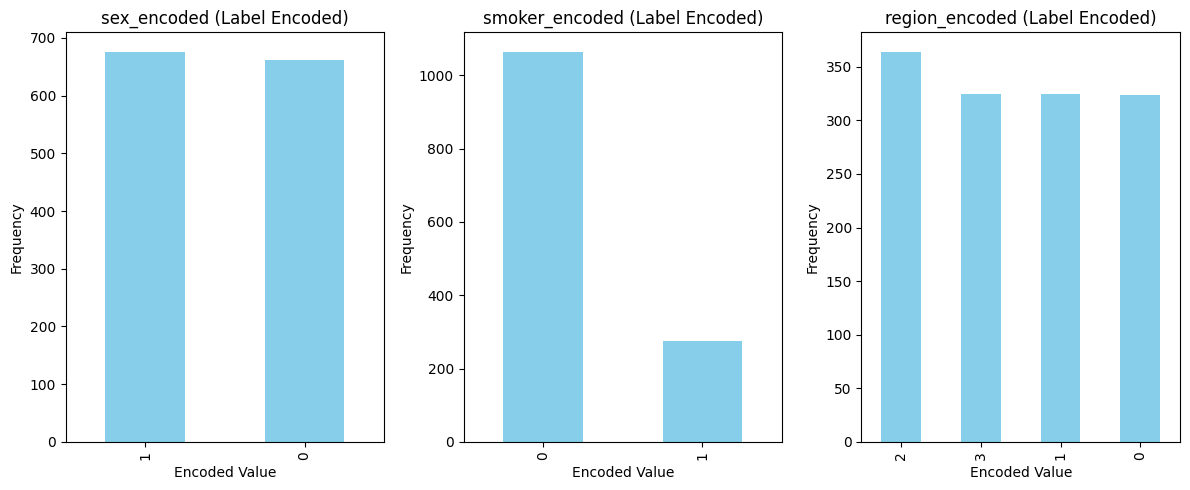

In [52]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'sex', 'smoker', and 'region' columns
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])
data['smoker_encoded'] = label_encoder.fit_transform(data['smoker'])
data['region_encoded'] = label_encoder.fit_transform(data['region'])

# Visualize the encoded categorical data
encoded_cols = ['sex_encoded', 'smoker_encoded', 'region_encoded']

# Create subplots for visualization
plt.figure(figsize=(12, 5))

# Plot label encoded columns
for i, col in enumerate(encoded_cols, 1):
    plt.subplot(1, 3, i)
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{col} (Label Encoded)")
    plt.xlabel("Encoded Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Handling Outliers 

In [53]:
# Apply Winsorization to the 'charges' column
# Set the limits parameter based on the data characteristics and the level of outlier reduction desired
winsorized_charges = winsorize(data['charges'], limits=(0.05, 0.05))
data['charges_winsorized'] = winsorized_charges

# Check the summary statistics of the winsorized 'charges' column
print(data['charges_winsorized'].describe())


count     1338.000000
mean     13035.058716
std      11403.359955
min       1748.774000
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      41661.602000
Name: charges_winsorized, dtype: float64


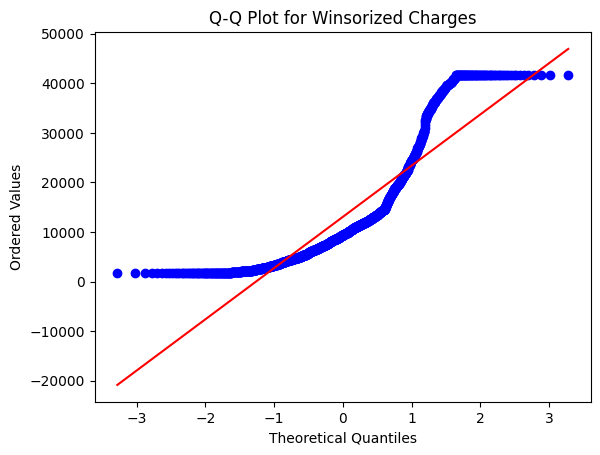


Summary of Q-Q Plot for Charges Distribution:
Number of Observations: 1338
Minimum Value: 1748.774
Maximum Value: 41661.602
Mean: 13035.058715589686
Variance: 130036618.26944134
Skewness: 1.3233907580485675
Kurtosis: 0.7130215147295225


In [55]:
# Generate the Q-Q plot for winsorized 'charges' column
stats.probplot(data['charges_winsorized'], dist='norm', plot=plt)
plt.title("Q-Q Plot for Winsorized Charges")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()


# Summary of Q-Q Plot
qq_summary = stats.describe(data['charges_winsorized'])
print(f"\nSummary of Q-Q Plot for Charges Distribution:")
print(f"Number of Observations: {qq_summary.nobs}")
print(f"Minimum Value: {qq_summary.minmax[0]}")
print(f"Maximum Value: {qq_summary.minmax[1]}")
print(f"Mean: {qq_summary.mean}")
print(f"Variance: {qq_summary.variance}")
print(f"Skewness: {qq_summary.skewness}")
print(f"Kurtosis: {qq_summary.kurtosis}")

In [56]:
# Apply logarithmic transformation to 'charges' column
data['charges_log_transformed'] = np.log(data['charges'])

# Calculate summary statistics for the log-transformed 'charges'
summary_log_transformed = data['charges_log_transformed'].describe()

print(summary_log_transformed)


count    1338.000000
mean        9.098659
std         0.919527
min         7.022756
25%         8.463853
50%         9.146552
75%         9.719558
max        11.063045
Name: charges_log_transformed, dtype: float64


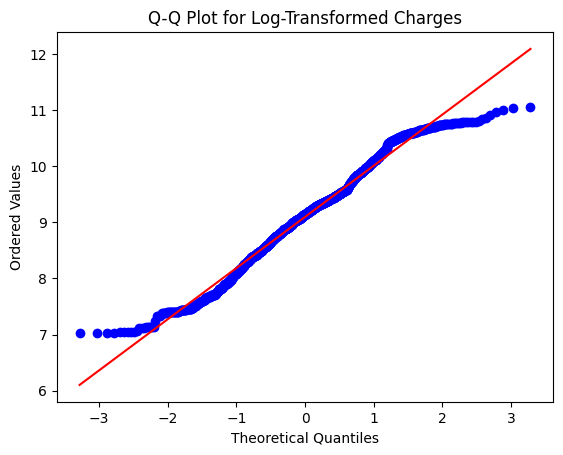


Summary of Q-Q Plot for Log-Transformed Charges Distribution:
Number of Observations: 1338
Minimum Value: 7.02275569117477
Maximum Value: 11.063044851063491
Mean: 9.098658729424766
Variance: 0.8455301114153918
Skewness: -0.08999648706579091
Kurtosis: -0.6387709043691352


In [58]:
# Generate the Q-Q plot for winsorized 'charges' column
stats.probplot(data['charges_log_transformed'], dist='norm', plot=plt)
plt.title("Q-Q Plot for Log-Transformed Charges")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Values")
plt.show()


# Summary of Q-Q Plot
qq_summary = stats.describe(data['charges_log_transformed'])
print(f"\nSummary of Q-Q Plot for Log-Transformed Charges Distribution:")
print(f"Number of Observations: {qq_summary.nobs}")
print(f"Minimum Value: {qq_summary.minmax[0]}")
print(f"Maximum Value: {qq_summary.minmax[1]}")
print(f"Mean: {qq_summary.mean}")
print(f"Variance: {qq_summary.variance}")
print(f"Skewness: {qq_summary.skewness}")
print(f"Kurtosis: {qq_summary.kurtosis}")

### Correlation Analysis After all transformation (encoding, and log transformation)

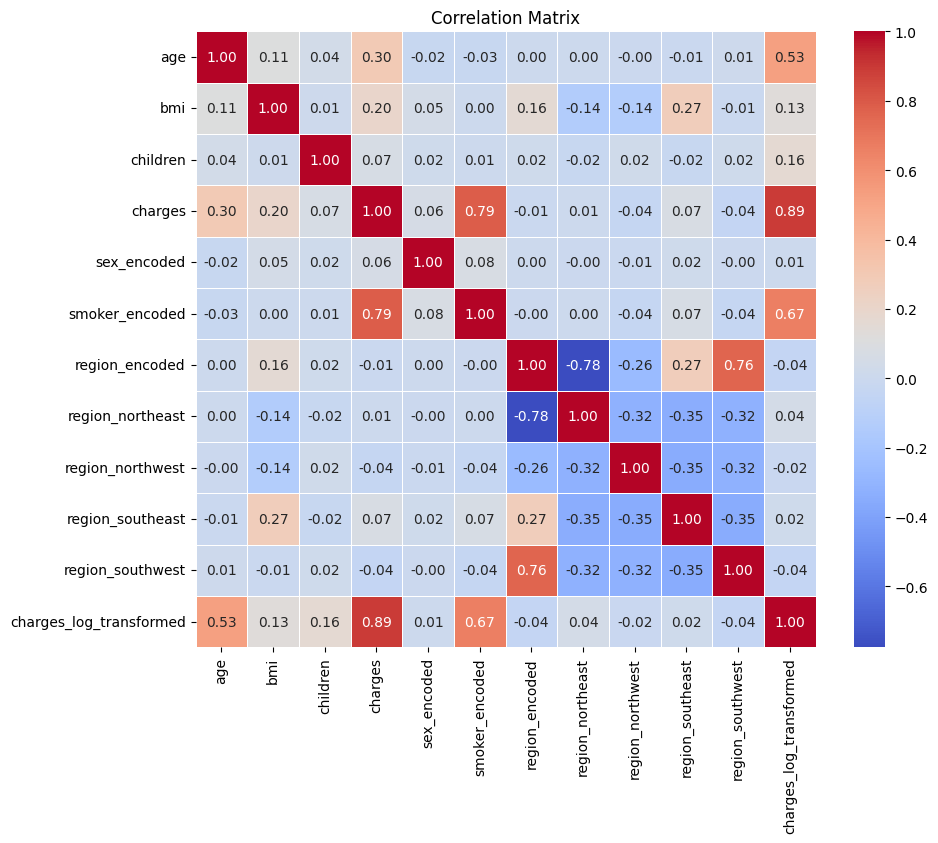

,age,bmi,children,charges,sex_encoded,smoker_encoded,region_encoded,region_northeast,region_northwest,region_southeast,region_southwest,charges_log_transformed
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002127,0.002475,-0.000407,-0.011642,0.010016,0.527834
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,0.157566,-0.138156,-0.135996,0.270025,-0.006205,0.132669
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.016569,-0.022808,0.024806,-0.023066,0.021914,0.161336
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.006208,0.006349,-0.039905,0.073982,-0.043210,0.892964
sex_encoded,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,0.004588,-0.002425,-0.011156,0.017117,-0.004184,0.005632
smoker_encoded,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.002181,0.002811,-0.036945,0.068498,-0.036945,0.665506
region_encoded,0.002127,0.157566,0.016569,-0.006208,0.004588,-0.002181,1.000000,-0.775730,-0.264469,0.268062,0.761212,-0.042690
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,-0.775730,1.000000,-0.320177,-0.345561,-0.320177,0.043115
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.264469,-0.320177,1.000000,-0.346265,-0.320829,-0.017824
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,0.268062,-0.345561,-0.346265,1.000000,-0.346265,0.015791


In [68]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

correlation_matrix

This correlation matrix shows the relationships between the encoded and log-transformed features. The diagonal elements represent the correlation of each feature with itself, which is always 1. The off-diagonal elements represent the correlations between different pairs of features. The values range from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no correlation.

Based on the correlation matrix, we can observe that the 'charges_log_transformed' feature has a relatively strong positive correlation with 'age' (0.53), 'bmi' (0.13), 'children' (0.16), 'smoker_encoded' (0.67), and 'region_southeast' (0.02). The 'charges_log_transformed' feature also has a strong negative correlation with 'region_northeast' (-0.04) and 'region_southwest' (-0.04).

# Feature Selection 

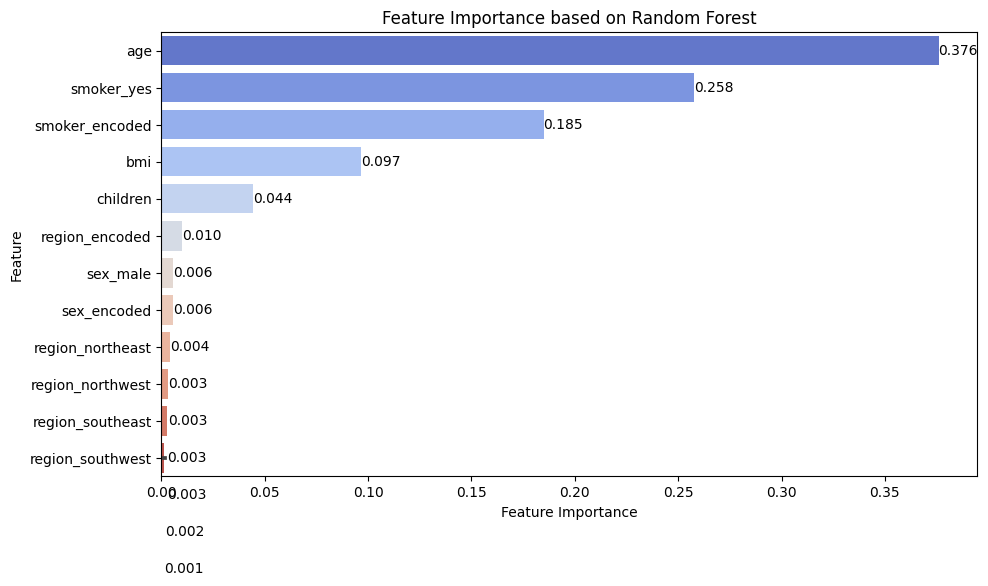

,Feature,Importance
0,age,0.375976
11,smoker_yes,0.257626
4,smoker_encoded,0.184896
1,bmi,0.096721
2,children,0.044479
5,region_encoded,0.009867
10,sex_male,0.005762
3,sex_encoded,0.005747
6,region_northeast,0.004375
7,region_northwest,0.003356


In [102]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get the feature importances from the model
feature_importance_scores = rf_model.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame to store the feature importances and their corresponding names
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance_scores})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance based on Random Forest')

# Add labels to the bars
for index, value in enumerate(feature_importance_df['Importance']):
    plt.text(value, index, f'{value:.3f}', ha='left', va='center')

plt.tight_layout()
plt.show()

feature_importance_df

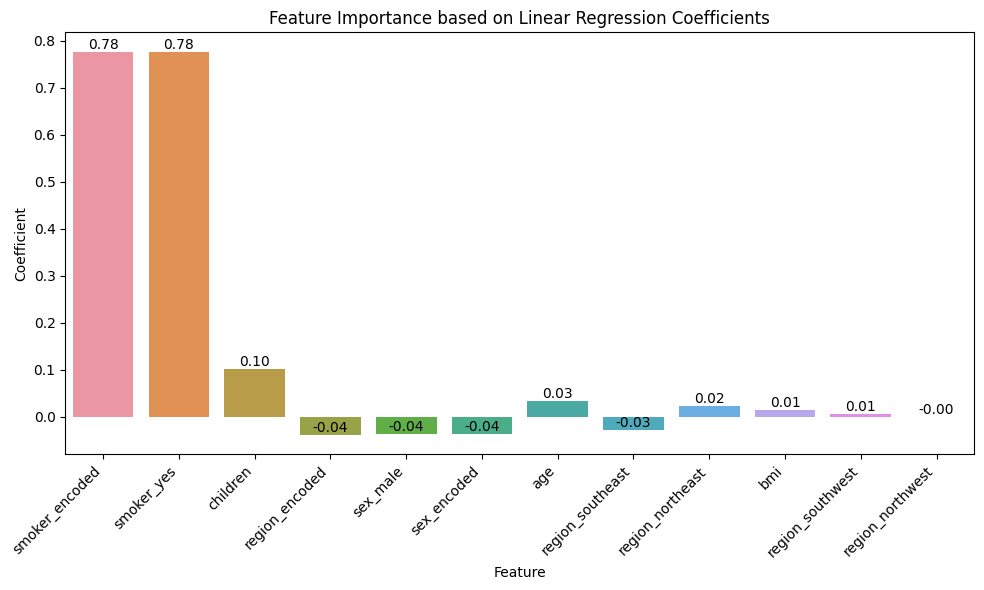

In [100]:
# Initialize the linear regression model
linear_model = LinearRegression()

# Train the model on your data
linear_model.fit(X, y)

# Get the coefficients of the features
coefficients = linear_model.coef_

# Create a dictionary to map feature names to their coefficients
feature_importance = dict(zip(X.columns, coefficients))

# Sort the feature importance dictionary based on absolute values of coefficients
sorted_feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: abs(item[1]), reverse=True)}

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=list(sorted_feature_importance.keys()), y=list(sorted_feature_importance.values()))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance based on Linear Regression Coefficients')
plt.tight_layout()

# Add bar labels
for index, value in enumerate(sorted_feature_importance.values()):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')

plt.show()


In [105]:
# Assuming you have already performed the necessary data preprocessing and encoding

# Separate the target variable 'charges_log_transformed' and the features
X = data_encoded.drop(columns=['charges', 'charges_log_transformed'])
y = data_encoded['charges_log_transformed']

# Initialize the feature selector (e.g., SelectKBest with mutual_info_regression)
selector = SelectKBest(score_func=mutual_info_regression, k=6)

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get the selected features' indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['age', 'children', 'sex_encoded', 'smoker_encoded', 'sex_male',
       'smoker_yes'],
      dtype='object')


# Regression Model 

In [120]:
# Separate the target variable 'charges_log_transformed' and the features
X = data_encoded.drop(columns=['charges', 'charges_log_transformed'])
y = data_encoded['charges_log_transformed']

# Initialize the feature selector (e.g., SelectKBest with mutual_info_regression)
selector = SelectKBest(score_func=mutual_info_regression, k=11)

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get the selected features' indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_indices]

# Perform data splitting
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
ev = explained_variance_score(y_test, y_pred)

# Calculate the number of samples and number of features
n = len(y_test)
p = X_test.shape[1]

# Calculate the Adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Create a DataFrame to store the evaluation results
evaluation_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)',
               'R-squared (R2)', 'Adjusted R-squared', 'Explained Variance Score (EV)'],
    'Value': [mse, mae, rmse, r2, adjusted_r2, ev]
})

# Print the evaluation DataFrame
evaluation_df


,Metric,Value
0,Mean Squared Error (MSE),0.175574
1,Mean Absolute Error (MAE),0.269692
2,Root Mean Squared Error (RMSE),0.419016
3,R-squared (R2),0.804731
4,Adjusted R-squared,0.796341
5,Explained Variance Score (EV),0.806612


The model seems to have decent performance, with a high R-squared and explained variance score.

model is performing better with K=11, as the MSE, MAE, and RMSE have decreased, while R-squared, Adjusted R-squared, and Explained Variance Score have increased. This suggests that selecting 11 features using the SelectKBest method has led to a more informative model that can better explain the variance in the target variable (charges_log_transformed).

However, it's important to note that increasing K may lead to more complex models, and there is a risk of overfitting if some of the selected features are noise or not truly relevant to the target variable.

Additionally, further experimentation and cross-validation can help determine the optimal number of features to include in the model for the best trade-off between complexity and performance.

### Experimenting with model performance improvement using cross-validation and trying different algorithms

In [124]:
# Separate the target variable 'charges_log_transformed' and the features
X = data_encoded.drop(columns=['charges', 'charges_log_transformed'])
y = data_encoded['charges_log_transformed']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models you want to experiment with
linear_regression_model = LinearRegression()
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# List of models to try
models = [linear_regression_model, random_forest_model]

# Dictionary to store model performance metrics
model_metrics = {
    "Model": [],
    "Mean Squared Error (MSE)": [],
    "Mean Absolute Error (MAE)": [],
    "Root Mean Squared Error (RMSE)": [],
    "R-squared (R2)": [],
    "Adjusted R-squared": [],
    "Explained Variance Score (EV)": []
}

# Loop through the models and evaluate performance using cross-validation
for model in models:
    model_name = type(model).__name__
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mse_scores = -scores
    mae_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    rmse_scores = np.sqrt(mse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    ev_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='explained_variance')
    
    model_metrics["Model"].append(model_name)
    model_metrics["Mean Squared Error (MSE)"].append(np.mean(mse_scores))
    model_metrics["Mean Absolute Error (MAE)"].append(np.mean(np.abs(mae_scores)))
    model_metrics["Root Mean Squared Error (RMSE)"].append(np.mean(rmse_scores))
    model_metrics["R-squared (R2)"].append(np.mean(r2_scores))
    model_metrics["Adjusted R-squared"].append(1 - (1-np.mean(r2_scores))*(len(X_train)-1)/(len(X_train)-X_train.shape[1]-1))
    model_metrics["Explained Variance Score (EV)"].append(np.mean(ev_scores))

# Create a DataFrame to store the model metrics
model_metrics_df = pd.DataFrame(model_metrics)

# Display the model performance metrics
model_metrics_df


,Model,Mean Squared Error (MSE),Mean Absolute Error (MAE),Root Mean Squared Error (RMSE),R-squared (R2),Adjusted R-squared,Explained Variance Score (EV)
0,LinearRegression,0.205170,0.285209,0.451363,0.751281,0.747742,0.752136
1,RandomForestRegressor,0.158419,0.206467,0.395258,0.807179,0.804435,0.808009


We can observe that the Random Forest Regressor outperforms the Linear Regression model in all metrics, as it generally has lower MSE, MAE, and RMSE values, as well as higher R-squared, Adjusted R-squared, and Explained Variance Score. Therefore, the Random Forest Regressor is considered to be a better-performing model for this particular regression task.

### Experimenting with regularization and data scaling to improve model performance 

In [127]:
# Basic Linear Regression model with Ridge Regression or Lasso Regression

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train the Ridge Regression model using the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_ridge = ridge_model.predict(X_test)


In [128]:
# Using data scaling 

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features in the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [130]:

# Separate the target variable 'charges_log_transformed' and the features
X = data_encoded.drop(columns=['charges', 'charges_log_transformed'])
y = data_encoded['charges_log_transformed']

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features in the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1.0)

# Train the Ridge Regression model using the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred_ridge)
mae = mean_absolute_error(y_test, y_pred_ridge)
rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2 = r2_score(y_test, y_pred_ridge)
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
ev = explained_variance_score(y_test, y_pred_ridge)

# Create a DataFrame to store the evaluation metrics
eval_metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)',
               'R-squared (R2)', 'Adjusted R-squared', 'Explained Variance Score (EV)'],
    'Value': [mse, mae, rmse, r2, adjusted_r2, ev]
})

# Print the DataFrame
print("Model Evaluation Metrics for Ridge Regression:")
eval_metrics_df


Model Evaluation Metrics for Ridge Regression:


,Metric,Value
0,Mean Squared Error (MSE),0.175611
1,Mean Absolute Error (MAE),0.269834
2,Root Mean Squared Error (RMSE),0.419059
3,R-squared (R2),0.804691
4,Adjusted R-squared,0.793065
5,Explained Variance Score (EV),0.806574


The Ridge Regression model appears to perform well in predicting the insurance charges based on the given evaluation metrics.